In [0]:
!apt install proj-bin libproj-dev libgeos-dev

In [0]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
! pip install folium

In [0]:
import pandas as pd
import numpy as np
import matplotlib.patches as ptch
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import folium
import json

In [5]:
# работаю в гугле, отсюда эти строки
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [38]:
# импортирую данные из файла с агрегированными данными
data=pd.read_csv("gdrive/My Drive/Colab Notebooks/taxi_data.csv", sep=';', header=0, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2016-05-01 00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-01 01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-01 02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-01 03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-05-01 04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# создаю таблицу, в которой каждому региону соответствует общее количество поездок из него
data_count = pd.DataFrame(data.sum()) 
data_count.columns=['counts']
data_count.head()

,counts
1,0
2,0
3,0
4,0
5,0


In [40]:
# для самопроверки смотрю количество поездок в регионе с Empire State Building
data_count.loc['1231']

counts    489489
Name: 1231, dtype: int64

In [41]:
# считаю количество регионов, из которых не было совершено ни одной поездки
(data_count==0).sum()

counts    1283
dtype: int64

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


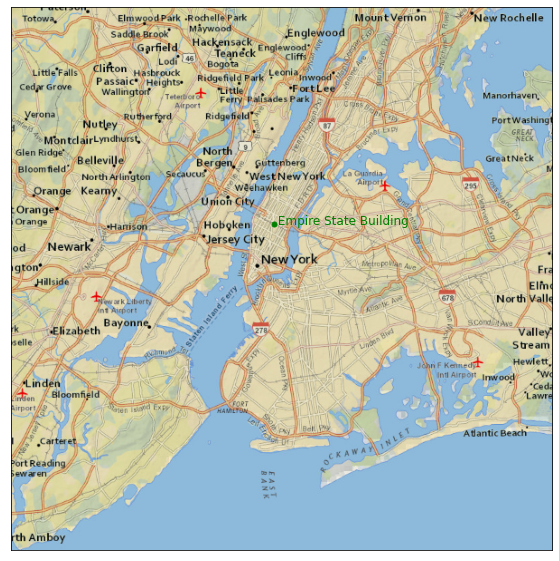

In [42]:
# рисую карту Нью-Йорка с использованием Basemap
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='mill', resolution='h', llcrnrlat=40.49612, llcrnrlon=-74.25559, urcrnrlat=40.91553,
            urcrnrlon=-73.70001, epsg=2260)

m.arcgisimage(service="NatGeo_World_Map", xpixels=600, ypixels=600)

# отмечаю на карте Empire State Building (зеленым цветом)
x, y = m(-73.985563, 40.748447)
plt.plot(x, y, 'og', markersize=5)
plt.text(x, y, ' Empire State Building', fontsize=12, color='g');


In [43]:
# Импортирую файл с регионами
regions=pd.read_csv("gdrive/My Drive/Colab Notebooks/regions.csv", sep=';', header=0)
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [44]:
# свожу регионы и поездки в них в одну таблицу
regions['trips']=data_count['counts'].values
regions.head()

,region,west,east,south,north,trips
0,1,-74.25559,-74.244478,40.496120,40.504508,0
1,2,-74.25559,-74.244478,40.504508,40.512896,0
2,3,-74.25559,-74.244478,40.512896,40.521285,0
3,4,-74.25559,-74.244478,40.521285,40.529673,0
4,5,-74.25559,-74.244478,40.529673,40.538061,0


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))


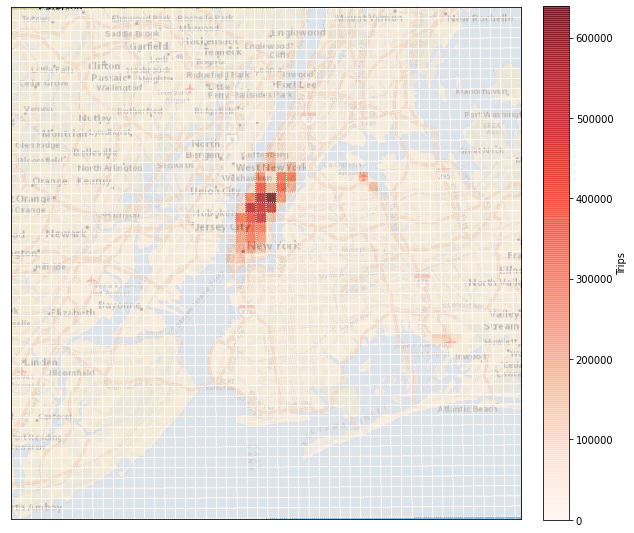

In [45]:
# получаю массивы координат для регионов
x=regions['west'].append(regions['east']).unique()
y=regions['south'].append(regions['north']).unique()
trips_count = regions['trips'].values.reshape((50,50),order='F')

# повторяю рисунок карты
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='cyl', resolution='h', llcrnrlat=y[0], llcrnrlon=x[0], urcrnrlat=y[-1:],
            urcrnrlon=x[-1:], epsg=2260)

m.arcgisimage(service="NatGeo_World_Map", xpixels=600, ypixels=600)

# расчерчиваю карту на регионы
m.drawparallels(y, color='w')
m.drawmeridians(x, color='w')


# раскрашиваю квадраты по цветам в зависимости от количества поездок
lon, lat = np.meshgrid(x, y)
m.pcolormesh(lon, lat, trips_count,
             latlon=True, cmap='Reds', alpha=0.7)

# рисую колорбар
plt.colorbar(label='Trips', fraction=0.046, pad=0.04)

plt.show()

In [0]:
# функция для рисования карты Нью-Йорка в библиотеке folium
def generateBaseMap(default_location=[y.mean(),x.mean()], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [84]:
# рисую карту с отмеченной Статуей Свободы
map_with_marker=generateBaseMap()
folium.Marker(location=[40.689277, -74.044592], popup = "Statue of Liberty", icon=folium.Icon(color = 'red')).add_to(map_with_marker)
map_with_marker

In [0]:
# функция для подготовки данных к записи в json файл
def jsongrid(table):
  
  r=table
  # создаю список координат для рисования квадрата на карте
  coords=[]
  for ind in r.index:
    cor=[]
    cor.append([r['west'][ind],r['north'][ind]])
    cor.append([r['east'][ind], r['north'][ind]])
    cor.append([r['east'][ind], r['south'][ind]])
    cor.append([r['west'][ind],r['south'][ind]])
    cor.append([r['west'][ind],r['north'][ind]])
    coords.append(cor)

  # список регионов
  regs=r['region'].values.tolist()

  # создание структуры
  jsongrid = {
      "type": "FeatureCollection", "features": [
        { "type": "Feature",
          "id": regs[i],
          "properties": {"name": regs[i]},
          "geometry" : {"type": "Polygon", "coordinates": [coords[i]]} 
        }for i in range(len(regs))]}
    
  return jsongrid

In [0]:
# запись в json файл
to_json = jsongrid(regions)

with open('gdrive/My Drive/Colab Notebooks/geodata.json', 'w') as f:
    json.dump(to_json, f)

In [50]:
# добавляю к регионам еще один столбец, в котором будет среднее количество поездок в час.
regions['tr_per_hour']=regions['trips']/744.
regions.head()

,region,west,east,south,north,trips,tr_per_hour
0,1,-74.25559,-74.244478,40.496120,40.504508,0,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0,0.0


In [85]:
# создаю новую карту
map_trips =generateBaseMap()

# указываю путь к файлу json, где размечены регионы
geodata='gdrive/My Drive/Colab Notebooks/geodata.json'

# разукрашиваю квадраты по регионам в зависимости от среднего числа поездок в час
folium.Choropleth(
    geo_data=geodata,
    name='Trips per Regiones and Hours',
    data=regions,
    columns=['region', 'tr_per_hour'],
    fill_color='OrRd',
    key_on='feature.id',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Trips per hours'
).add_to(map_trips)  


# добавляю управление слоями
folium.LayerControl().add_to(map_trips)

# вывожу карту
map_trips

In [86]:
# подсчет количества ячеек, в которых в среднем совершается больше 5 поездок в час
regions[regions.tr_per_hour>5].shape[0]

102

In [87]:
# выделяю такие поездки в отдельный датафрейм
fill_regions=regions[regions.tr_per_hour>5]
fill_regions.head()

,region,west,east,south,north,trips,tr_per_hour
1074,1075,-74.022246,-74.011135,40.697437,40.705825,49699,66.799731
1075,1076,-74.022246,-74.011135,40.705825,40.714213,102870,138.266129
1076,1077,-74.022246,-74.011135,40.714213,40.722601,64581,86.802419
1124,1125,-74.011135,-74.000023,40.697437,40.705825,49135,66.041667
1125,1126,-74.011135,-74.000023,40.705825,40.714213,135328,181.892473


In [0]:
# запись в файл данных только по тем регионам, в которых в среднем совершается больше 5 поездок в час
to_json_f = jsongrid(fill_regions)

with open('gdrive/My Drive/Colab Notebooks/geodata_fill.json', 'w') as f:
    json.dump(to_json_f, f)

In [94]:
# создаю новую карту для регионов, в которых совершается больше 5 поездок в час
map_trips_fill = folium.Map(location=[y.mean(),x.mean()], control_scale=True, zoom_start=12)

# указываю путь к файлу json, где размечены регионы
geodata_fill='gdrive/My Drive/Colab Notebooks/geodata_fill.json'

# разукрашиваю квадраты по регионам в зависимости от среднего числа поездок в час
folium.Choropleth(
    geo_data=geodata_fill,
    name='Trips per Regiones and Hours',
    data=fill_regions,
    columns=['region', 'tr_per_hour'],
    fill_color='OrRd',
    key_on='feature.id',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Trips per hours'
).add_to(map_trips_fill)  


# добавляю управление слоями
folium.LayerControl().add_to(map_trips_fill)

# вывожу карту
map_trips_fill

Посмотрела, и не нашла, чтобы какие-то квадраты были неверно обозначены, если только углом заезжают, что нормально.
